In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = {
    'Size (sqft)': [1200, 900, 1500, 1100, 1300, 1000, 1400, 1200, 800, 1600, 1100, 1300, 900, 1500, 1000],
    'Number of Bedrooms': [3, 2, 4, 3, 3, 2, 4, 3, 1, 5, 2, 3, 2, 4, 1],
    'Age of House (years)': [5, 10, 3, 8, 12, 6, 4, 9, 11, 2, 7, 5, 12, 6, 9],
    'Distance to City Center (miles)': [8, 12, 5, 9, 11, 10, 7, 8, 13, 6, 9, 8, 11, 5, 10],
    'Sale Price (USD)': [235000, 180000, 320000, 210000, 240000, 195000, 300000, 225000, 150000, 380000, 200000, 245000, 175000, 310000, 185000]
}

# Load into DataFrame
df = pd.DataFrame(data)
df.head(3)

,Size (sqft),Number of Bedrooms,Age of House (years),Distance to City Center (miles),Sale Price (USD)
0,1200,3,5,8,235000
1,900,2,10,12,180000
2,1500,4,3,5,320000


In [4]:
df.columns

Index(['Size (sqft)', 'Number of Bedrooms', 'Age of House (years)',
       'Distance to City Center (miles)', 'Sale Price (USD)'],
      dtype='object')

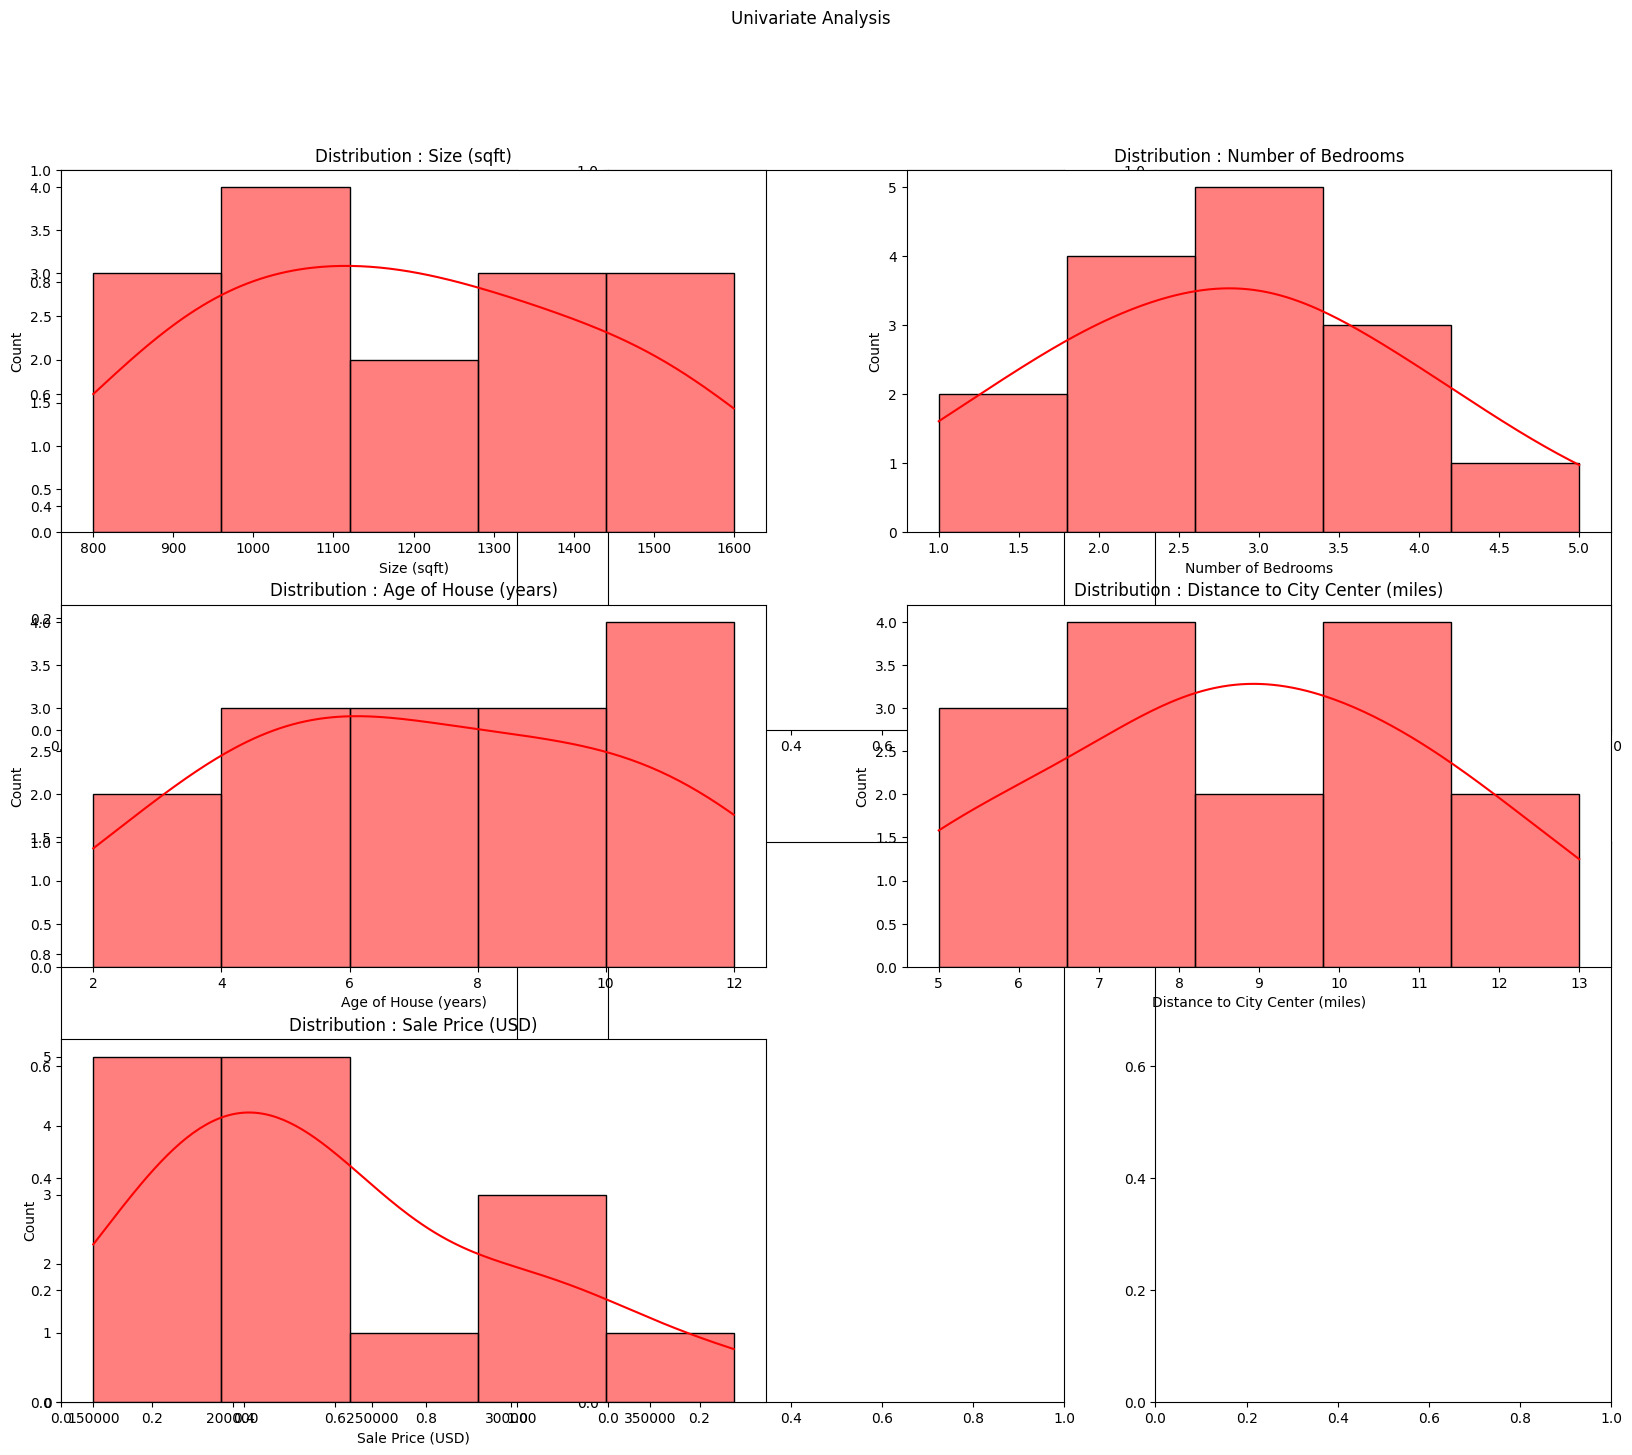

In [5]:
fig , axes = plt.subplots(ncols=3 , nrows= 2 , figsize = (20 , 16))
plt.suptitle('Univariate Analysis')
for i in range(len(df.columns)):
    plt.subplot(3 , 2 , i+1)
    sns.histplot(df[df.columns[i]] , color = 'r' , kde = True)
    title = 'Distribution : ' + df.columns[i]
    plt.title(title)
plt.show() 


In [6]:
x = df.drop('Sale Price (USD)' , axis = 1)
y = df['Sale Price (USD)']

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

col_transformer = Pipeline(steps=[
    ('scaler' , StandardScaler())
])

Preprocessor = ColumnTransformer(
    transformers=[
        ('scaling' , col_transformer , x.columns)
    ]
)

Preprocessed_data = Preprocessor.fit_transform(x)
column_names = [col.replace('scaling__' , '') for col in Preprocessor.get_feature_names_out()]
x = pd.DataFrame(Preprocessed_data , columns=column_names)
x.head()

,Size (sqft),Number of Bedrooms,Age of House (years),Distance to City Center (miles)
0,0.056433,0.180579,-0.734288,-0.341328
1,-1.213315,-0.722315,0.885465,1.365312
2,1.326182,1.083473,-1.382189,-1.621308
3,-0.366816,0.180579,0.237564,0.085332
4,0.479683,0.180579,1.533366,0.938652


In [8]:
from sklearn.model_selection import train_test_split

def data_splitter(df_features : pd.DataFrame , 
                  target_variable :pd.Series , 
                  testsize : float = 0.2 , 
                  random_state : int = 42):
    
    if len(df_features)!= len(target_variable):
        raise ValueError('Features and target must have same number of samples')
    
    x_train , x_test , y_train , y_test = train_test_split(df_features , target_variable, test_size=testsize, random_state=random_state)
    return x_train , x_test , y_train , y_test

x_train , x_test , y_train , y_test = data_splitter(x,y)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

def train_model(x_train , y_train , x_test , y_test) -> tuple:
    
    try:
        
        if any(params is None for params in [x_train , y_train , x_test , y_test]):
            raise ValueError('All input arguments must be provided')
        
        model = LinearRegression()
        model.fit(x_train , y_train)
        
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_test , y_pred)
        r2 = r2_score(y_test , y_pred)
        
        return mse , r2
    
    except Exception as e:
        
        print(f"An error occurred : {e}")
        
mse , r2 = train_model(x_train , y_train , x_test , y_test)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

An error occurred : All input arguments must be provided


TypeError: cannot unpack non-iterable NoneType object